In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy.stats import pearsonr

(array([   9.,   31.,  104.,  195.,  243.,  223.,  129.,   48.,   14.,    4.]),
 array([-0.13466698, -0.10634068, -0.07801438, -0.04968808, -0.02136178,
         0.00696452,  0.03529082,  0.06361712,  0.09194341,  0.12026971,
         0.14859601]),
 <a list of 10 Patch objects>)

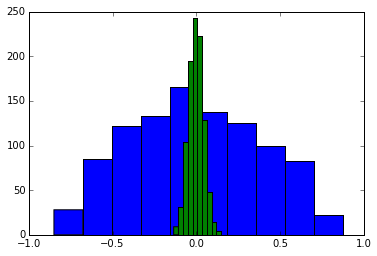

In [17]:
#generate a signal with a power-law frequency spectrum
n=1024
freq = np.fft.rfftfreq(n, d=1.0)

freq[0]=0.00001
r=[]
r_random=[]

for i in range(1000):
    random_phase1=np.random.random_sample(len(freq))*np.pi*2
    random_phase2=np.random.random_sample(len(freq))*np.pi*2
    error1=0.5*np.random.normal(0,1,len(freq))
    error2=0.5*np.random.normal(0,1,len(freq))
    power_spect1=freq**-1.0*(np.cos(random_phase1)+1j*np.sin(random_phase1))*(1.0+error1)
    power_spect1[0]=0.0
    ps1=np.abs(power_spect1)**2
    power_spect2=freq**-1.0*(np.cos(random_phase2)+1j*np.sin(random_phase2))*(1.0+error2)
    power_spect2[0]=0.0
    ps2=np.abs(power_spect2)**2
    signal1=np.fft.irfft(power_spect1)
    signal2=np.fft.irfft(power_spect2)
    rr,pp=pearsonr(signal1,signal2)
    rs,ps=pearsonr(error1,error2)
    r.append(rr)
    r_random.append(rs)
plt.hist(r)
plt.hist(r_random)

In [18]:
rr

0.15879976206196678